In [44]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [7]:
 features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
   cluster_std=2.75,
     random_state=42
   )

In [8]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [28]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [29]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [30]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
   n_init=10,
   max_iter=300,
   random_state=42
  )

In [31]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [32]:
# The lowest SSE value 

kmeans.inertia_

74.57960106819854

In [33]:
# Final locations of the centroid 
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [35]:
# The number of iterations required to converge 
kmeans.n_iter_ 

2

In [36]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [48]:
 kmeans_kwargs = { 
      "init": "random", 
      "n_init": 10, 
      "max_iter": 300, 
      "random_state": 42,
     } 


In [58]:
# A list holds the SSE values for each k 
#sse = [] 
#for k in range(1, 11): 
#kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#kmeans.fit(scaled_features) 
#sse.append(kmeans.inertia_)


In [67]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score



In [68]:
features, true_labels = make_moons( 
n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [69]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
scaled_features, dbscan.labels_
).round (2)


In [70]:
kmeans_silhouette 


0.5

In [71]:
dbscan_silhouette

0.38

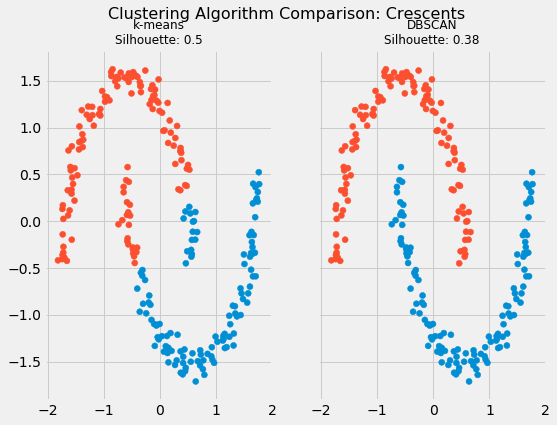

In [72]:
# Plot the data and cluster silhouette comparison
   ...: fig, (ax1, ax2) = plt.subplots(
   ...:     1, 2, figsize=(8, 6), sharex=True, sharey=True
   ...: )
   ...: fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
   ...: fte_colors = {
   ...:     0: "#008fd5",
   ...:     1: "#fc4f30",
   ...: }
   ...: # The k-means plot
   ...: km_colors = [fte_colors[label] for label in kmeans.labels_]
   ...: ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
   ...: ax1.set_title(
   ...:     f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
   ...: )
   ...:
   ...: # The dbscan plot
   ...: db_colors = [fte_colors[label] for label in dbscan.labels_]
   ...: ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
   ...: ax2.set_title(
   ...:     f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
   ...: )
   ...: plt.show()

In [73]:
In [25]: ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
   ...: ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [74]:
In [26]: round(ari_kmeans, 2)


0.47